# Q-Learning (Crawling Robot)

In [1]:
from agent import Q_Agent
import numpy as np
import math
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from crawler_env import CrawlingRobotEnv

initial_e_greedy_prob = 1.0
all_rewards = 0
total_reward = 0
num_iterations_train = 400
eval_iterations = 100
# Bigger values decay faster
e_greedy_decay = 1. / num_iterations_train

# Lego-Robot States and Action spaces
n_arms_state, n_hand_state = (3,3)

#### Create Environment

In [2]:
env = CrawlingRobotEnv(render=True, n_arms_state=n_arms_state, n_hand_state=n_hand_state)
current_state = env.reset()

### Action and State space before training

In [3]:
# Get the action space
print('Robot action space:', env.action_space.n)
print('Robot state-space:', np.prod([state.n for state in env.observation_space]))
print('Reset State:', current_state)

Robot action space: 6
Robot state-space: 9
Reset State: 4


#### Create Agent

In [4]:
agent = Q_Agent(env, gamma=0.9, alpha=0.2, e_greedy_prob=initial_e_greedy_prob, e_greedy_decay=e_greedy_decay)

##### Agent Internal Action-Space table

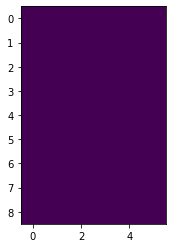

In [5]:
plt.imshow(agent.q_val_table)
plt.show()

#### Training

In [6]:
# Training
i = 0
while i < num_iterations_train:
    i = i + 1
    action = agent.choose_action(current_state)
    next_state, reward, done, info = env.step(action)
    agent.update_q_table(current_state, action, reward, next_state)
    current_state = next_state
    total_reward += reward

    # Evaluate
    if i % eval_iterations == 0:
        print("average_reward in last 1 steps", total_reward / i)
        # Stop training if total reward is big enough
        if (total_reward / i) > 1.8:
            break
        average_reward = 0
        env.render = False

average_reward in last 1 steps 0.021670746010822767
average_reward in last 1 steps 0.0
average_reward in last 1 steps 1.0158198930129982
average_reward in last 1 steps 2.2851917620838544


#### Action-Space after training

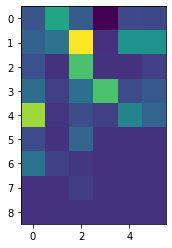

In [7]:
plt.imshow(agent.q_val_table)
plt.show()

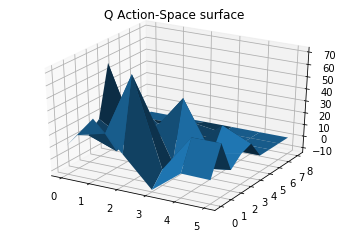

In [8]:
# Convert 2D list to numpy array
q_val_table = np.array(agent.q_val_table)
nx, ny = q_val_table.shape[1], q_val_table.shape[0]
x = range(nx)
y = range(ny)
hf = plt.figure()
ha = hf.add_subplot(111, projection='3d')
X, Y = np.meshgrid(x, y)
ha.plot_surface(X, Y, q_val_table)
plt.title('Q Action-Space surface')
plt.show()

#### Evaluate

In [36]:
# Evaluating
env = CrawlingRobotEnv(render=True, n_arms_state=n_arms_state, n_hand_state=n_hand_state)
current_state=env.reset()
total_reward = 0
# Force epsilon-greedy to always use the max Q (become greedy)
agent.e_greedy_prob = 0

for i in range(100):
    action = agent.choose_action(current_state)
    print('Doing Action:', action)
    next_state, reward, done, info = env.step(action)
    current_state = next_state
    total_reward += reward
    print(reward)

Doing Action: 0
4.820632438158896
Doing Action: 2
47.33399807388014
Doing Action: 1
-2.167074601082277
Doing Action: 3
0.0
Doing Action: 0
4.820632438158896
Doing Action: 2
47.33399807388014
Doing Action: 1
-2.167074601082277
Doing Action: 3
0.0
Doing Action: 0
4.820632438158896
Doing Action: 2
47.33399807388014
Doing Action: 1
-2.167074601082277
Doing Action: 3
0.0
Doing Action: 0
4.820632438158896
Doing Action: 2
47.33399807388014
Doing Action: 1
-2.167074601082277
Doing Action: 3
0.0
Doing Action: 0
4.820632438158896
Doing Action: 2
47.33399807388014
Doing Action: 1
-2.167074601082277
Doing Action: 3
0.0
Doing Action: 0
4.820632438158896
Doing Action: 2
47.33399807388014
Doing Action: 1
-2.167074601082277
Doing Action: 3
0.0
Doing Action: 0
4.820632438158896
Doing Action: 2
47.33399807388014
Doing Action: 1
-2.167074601082277
Doing Action: 3
0.0
Doing Action: 0
4.820632438158896
Doing Action: 2
47.33399807388014
Doing Action: 1
-2.167074601082277
Doing Action: 3
0.0
Doing Action: 0


In [41]:
env = CrawlingRobotEnv(render=True, n_arms_state=n_arms_state, n_hand_state=n_hand_state)
current_state=env.reset()
print('Current state:', current_state)
for i in range(4):
    next_state, reward, done, info = env.step(0)
    print('Reward:', reward, next_state)

Current state: 4
Reward: 4.820632438158896 1
Reward: 0.0 1
Reward: 0.0 1
Reward: 0.0 1


(1, 4.820632438158896, False, {})

In [14]:
env.step(0)

(1, 0.0, False, {})